# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#found at https://www.programiz.com/python-programming/datetime/current-datetime
from datetime import date
today = date.today()
todays_date = today.strftime("%m/%d/%Y")
from scipy.stats import linregress

# Import API key
weather_api_key="d2856d7eb072d152cb30603f30cf6107"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#sleep function found at https://www.tutorialspoint.com/python/time_sleep.html
#creating the base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
#making a bunch of lists that we can add to later
cities_list=[]
lat=[]
long=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
print("Beginning Data Retrieval")
print("------------------------")

#make a try so that we can make an except later
#go through each city and take its index value
for index, city in enumerate(cities):
    try:
        #get the json response
        response = requests.get(f'{url}q={city}&appid={weather_api_key}&units={units}').json()
        #we have to stop the program for a little more than a second just to make sure that we dont go over the api amount
        time.sleep(1.1)
        #print the current city that we are processing
        print(f'Processing Record {index + 1} | {city}')
        #going through all of the json and getting each of the fields that we need
        date.append(response['dt'])
        country.append(response['sys']['country'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cities_list.append(city)
    except:
        print("Sorry the city was not found!")
                  

Beginning Data Retrieval
------------------------
Processing Record 1 | suining
Processing Record 2 | itaituba
Processing Record 3 | laguna
Processing Record 4 | paka
Processing Record 5 | katsuura
Processing Record 6 | dingle
Processing Record 7 | longyearbyen
Processing Record 8 | saint-philippe
Processing Record 9 | barentsburg
Sorry the city was not found!
Processing Record 10 | faanui
Processing Record 11 | vaini
Processing Record 12 | butaritari
Processing Record 13 | anadyr
Processing Record 14 | bethel
Processing Record 15 | berlevag
Processing Record 16 | xining
Processing Record 17 | bonavista
Processing Record 18 | lebu
Processing Record 19 | kapaa
Processing Record 20 | alveringem
Processing Record 21 | am timan
Processing Record 22 | tokomaru
Processing Record 23 | caranavi
Processing Record 24 | te anau
Processing Record 25 | mataura
Processing Record 26 | norman wells
Processing Record 27 | cape town
Processing Record 28 | balsas
Processing Record 29 | ariquemes
Processi

Processing Record 231 | nanortalik
Processing Record 232 | meulaboh
Processing Record 233 | mococa
Processing Record 234 | ambunti
Processing Record 235 | port macquarie
Processing Record 236 | cabedelo
Processing Record 237 | college
Processing Record 238 | makakilo city
Processing Record 239 | araguacu
Processing Record 240 | goderich
Processing Record 241 | mbabane
Processing Record 242 | hamilton
Processing Record 243 | lompoc
Processing Record 244 | duobao
Processing Record 245 | dikson
Processing Record 246 | touros
Processing Record 247 | xichang
Processing Record 248 | port elizabeth
Processing Record 249 | muli
Processing Record 250 | narrabri
Processing Record 251 | mvomero
Processing Record 252 | inhambane
Processing Record 253 | mallapuram
Processing Record 254 | shar
Processing Record 255 | mabini
Processing Record 256 | qiongshan
Processing Record 257 | petropavl
Processing Record 258 | bokoro
Processing Record 259 | kuantan
Processing Record 260 | stavern
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#take all of the lists that we have and put them into a dictionary
data={"Cities":cities_list, "Latitude":lat, "Longitude":long, "max_temp":max_temp, "humidity":humidity, 'Cloudiness':cloudiness,
      'Wind Speed':wind_speed,'Country':country,'Date':date}
#turn this data into a dataframe
cities_df = pd.DataFrame(data)
#saving the csv to the output data folder
cities_df.to_csv('../output_data/Cities_data.csv')
cities_df

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
for index, row in cities_df.iterrows():
    if row["humidity"] >100:
        cities_df.drop(index, inplace=False)
clean_city_data = cities_df.copy()
clean_city_data.to_csv('../output_data/cleaned_data.csv')



In [138]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

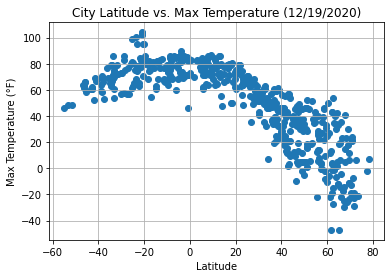

In [166]:
#Creating a scatter plot with the two sets of data
plt.scatter(clean_city_data["Latitude"],clean_city_data["max_temp"])
plt.title(f"City Latitude vs. Max Temperature ({todays_date})")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('../output_data/latitudeVSmax_temp.png')
#This graph is analyzing the temperature of each city against the latitude. What we can see here is that as we get closer to
#the equater the temperature seems to get hotter and vice versa

## Latitude vs. Humidity Plot

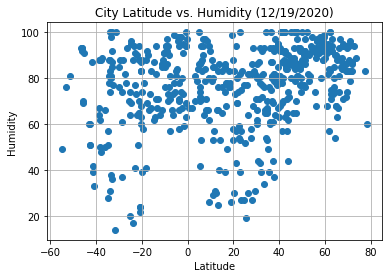

In [167]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["humidity"])
plt.title(f"City Latitude vs. Humidity ({todays_date})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('../output_data/latitudeVSHumidity.png')
#This graph is analyzing the humidity of each city against the latitude. Across a lot of the latitudes there seems to be a spread of humidity

## Latitude vs. Cloudiness Plot

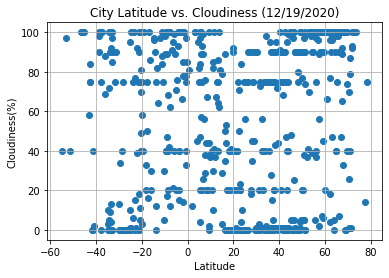

In [168]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"])
plt.title(f"City Latitude vs. Cloudiness ({todays_date})")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('../output_data/latitudeVCloudiness.png')
#This graph is analyzing the cloudiness of each city against the latitude. We can analyze that on a lot of these latitudes
# majority of the clouds are at the extremes, either very cloudy or not cloudy at all

## Latitude vs. Wind Speed Plot

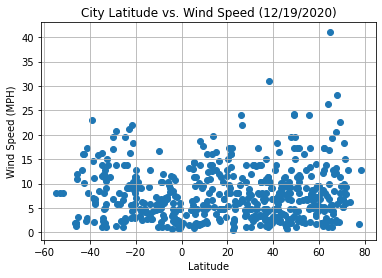

In [169]:
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"])
plt.title(f"City Latitude vs. Wind Speed ({todays_date})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig('../output_data/latitudeVSWindSpeed.png')
#This graph is analyzing the Wind Speed of each city against the latitude. It shows that as we get closer to the north pole
# of the earth, the wind speeds seem to pick up a little bit

## Linear Regression

In [170]:
#Creating two seperate dataframes for the northern and southern hemispheres
northern_hemisphere = clean_city_data[clean_city_data["Latitude"]>=0]
southern_hemisphere = clean_city_data[clean_city_data["Latitude"]<0]
northern_hemisphere.to_csv('../output_data/northern_hemisphere.csv')
southern_hemisphere.to_csv('../output_data/southern_hemisphere.csv')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

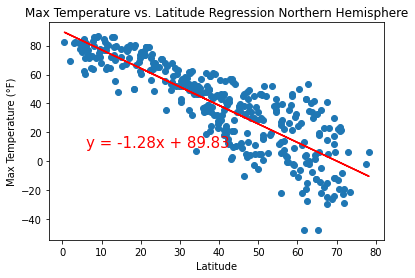

<Figure size 432x288 with 0 Axes>

In [171]:
#taking our x and y values from this for later use
y_values = northern_hemisphere['max_temp']
x_values = northern_hemisphere['Latitude']

#get values so from the linregress function so that we can use these for our equations
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
#create the line equation to print it on the graph
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title("Max Temperature vs. Latitude Regression Northern Hemisphere")
plt.show()
rvalue
plt.savefig('../output_data/regrssionNHmax_temp.png')
#from this correlation we can see that there is a strong negative correlation between the max temperature and the increasing 
#latitude in the northern hemisphere. This makes sense because as we get further from the equater it gets colder.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

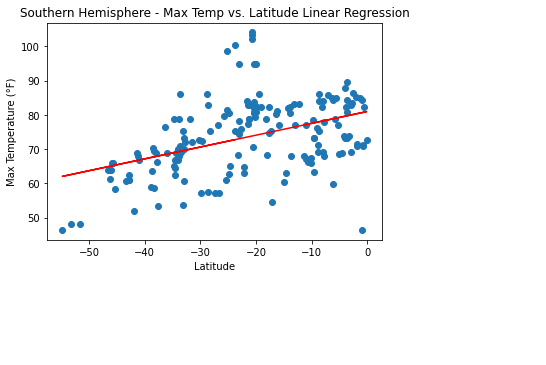

<Figure size 432x288 with 0 Axes>

In [172]:
y_values = southern_hemisphere['max_temp']
x_values = southern_hemisphere['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
rvalue
plt.savefig('../output_data/regrssionSHmax_temp.png')
#In the southern hemisphere there is a moderate correlation between the latitude and the max temperatures for these cities.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

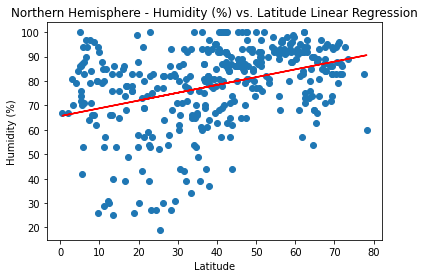

<Figure size 432x288 with 0 Axes>

In [173]:

y_values = northern_hemisphere['humidity']
x_values = northern_hemisphere['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()
rvalue
plt.savefig('../output_data/regrssionNHhumidity.png')
#There is also moderate correlation between the latitude and the humidity. As we increase in latitude the humidity slightly rises


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

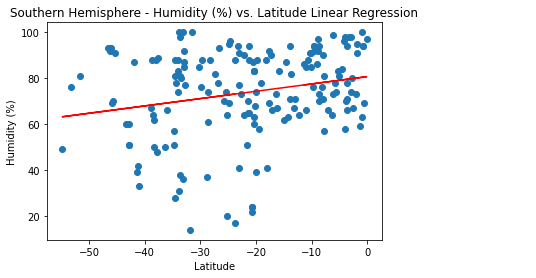

<Figure size 432x288 with 0 Axes>

In [174]:

y_values = southern_hemisphere['humidity']
x_values = southern_hemisphere['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()
rvalue
plt.savefig('../output_data/regrssionSHhumidity.png')
#In the southern hemisphere it is a very similar situation. The humidity rises as we get closer to the north. There is a 
#moderate correlation between the two values

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

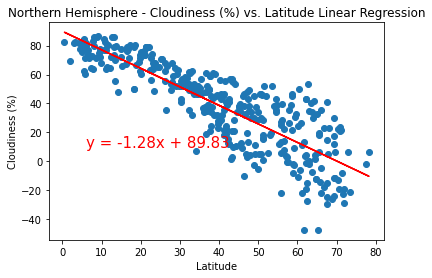

<Figure size 432x288 with 0 Axes>

In [175]:

y_values = northern_hemisphere['max_temp']
x_values = northern_hemisphere['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()
rvalue
plt.savefig('../output_data/regrssionNHcloudiness.png')
#There is a strong negative correlation between the cloudiness and the increasing latitude. As the latitude increases the clouds
#strongly fade

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

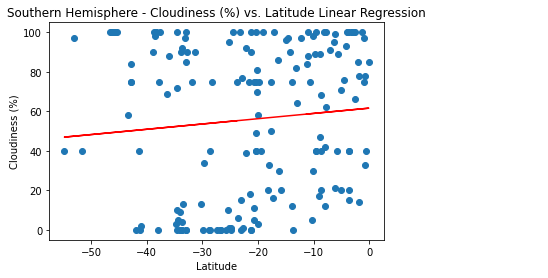

<Figure size 432x288 with 0 Axes>

In [176]:

y_values = southern_hemisphere['Cloudiness']
x_values = southern_hemisphere['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()
rvalue
plt.savefig('../output_data/regrssionSHcloudiness.png')
#In the southern hemisphere there is almost no correlation between the cloudiness and the latitude. It seems almost random.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

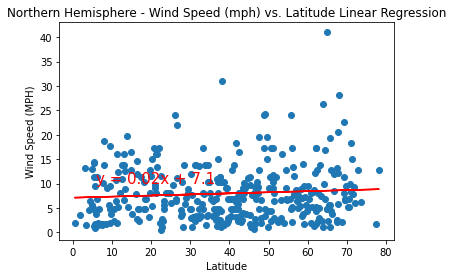

<Figure size 432x288 with 0 Axes>

In [177]:
northern_hemisphere = clean_city_data[clean_city_data["Latitude"]>=0]
y_values = northern_hemisphere['Wind Speed']
x_values = northern_hemisphere['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
rvalue
plt.savefig('../output_data/regrssionNHwind_speed.png')
#There is almost no correlation between the wind speed and the latitude in the northern hemisphere. We can conclude this since
#the rvalue is only .07

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

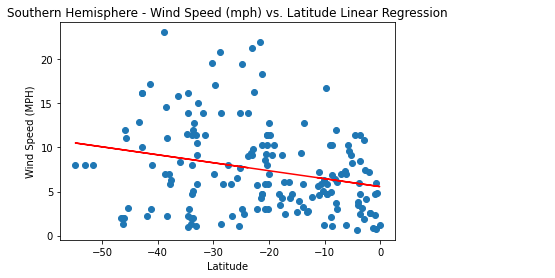

<Figure size 432x288 with 0 Axes>

In [178]:
southern_hemisphere = clean_city_data[clean_city_data["Latitude"]<0]
y_values = southern_hemisphere['Wind Speed']
x_values = southern_hemisphere['Latitude']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.show()
rvalue
plt.savefig('../output_data/regrssionSHwind_speed.png')
#In the southern hemisphere there seems to be a small correlation between the wind speed and the latitude.